# Glue

---

#### Analyse fondamentale

Introduit par Wang et al. dans [GLUE: A Multi-Task Benchmark and Analysis Platform for Natural Language Understanding](https://paperswithcode.com/paper/glue-a-multi-task-benchmark-and-analysis), GLUE, qui signifie General Language Understanding Evaluation benchmark est un ensemble de ressources permettant l'entraînement, l'évaluation et l'analyse des modèles de langage qui permettent de réaliser diverses tâches de compréhension du langage naturel (NLU). L'outil est conçu de manière à être compatible avec tout système traitant des phrases ou des paires de phrases pour faire des prédictions. Ces ressources se composent de :

- Un jeu de données permettant d'évaluer les performances des différents modèles dans chacune des tâches de NLU étudiées. Les données dont nous disposons évaluent 8 modèles sortis entre 2017 et 2019. Tandis que la première moitié des modèles est basée sur des encodeurs de type LSTM (Long Short-Term Memory), les 4 plus récents reposent sur les Transformers.
- Un leaderboard public permettant de présenter et de visualiser les performances des modèles sur des données servant à l'évaluation.
- Un benchmark de 9 tâches de NLU à partir de jeux de données minutieusement construits afin de couvrir une gamme variée en termes de taille, de genre textuels et de niveaux de difficulté. Parmi ces tâches l'on retrouve :
  - Les tâches sur des phrases isolées :
    - CoLA (Corpus of Linguistic Acceptability) : Valide la syntaxe grammaticale d'une suite de mots issus de documents sur la théorie linguistique.
    - SST-2 (Stanfort Sentiment Treebank) : Prédit le sentiment (positif ou négatif) de phrases de critiques de films.
  - Les tâches de similarité et de paraphrase :
    - MRPC (Microsoft Research Paraphrase Corpus) : Juge de l'équivalence sémantique de deux phrases tirées de sources d'informations en ligne.
    - QQP (Quora Question Pairs) : Juge de l'équivalence sémantique de deux questions posées sur le forum Quora.
    - STS-B (Semantic Textual Similarity Benchmark) : Prédit un score de similarité entre 1 et 5 entre des paires de phrases tirées de titres de journaux, de légendes de vidéos et d'images, et de données d'inférence en langage naturel.
  - Les tâches d'inférence :
    - MNLI (Multi-Genre Natural Language Inference Corpus) : Evalue la relation logique entre une phrase prémisse et une phrase hypothèse (implication, contradiction, neutralité).
    - QNLI (Stanford Question Answering Dataset) : Des questions sont associés à des paragraphes contenant la réponse, l'objectif étant de retrouver la phrase dans laquelle se trouve cette dernière.
    - RTE (Recognizing Textual Entailment) : Cette tâche consiste à reconnaître, à partir de deux fragments de texte, si le sens de l'un peut être déduit de l'autre.
    - WNLI (Winograd Schema Challenge) : Ici, le système reçoit une phrase contenant un pronom et sélectionne son référent parmi une liste de choix. Notons que le score associé à cette dernière tâche n'apparaît pas dans notre dataset chargé depuis Seaborn.

Sources :
1. https://gluebenchmark.com/
2. https://paperswithcode.com/dataset/glue
3. https://www.tensorflow.org/datasets/catalog/glue
4. https://paperswithcode.com/paper/glue-a-multi-task-benchmark-and-analysis

---

#### Setup

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [3]:
df = sns.load_dataset("glue")
df.head()

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Model    64 non-null     object 
 1   Year     64 non-null     int64  
 2   Encoder  64 non-null     object 
 3   Task     64 non-null     object 
 4   Score    64 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


#### **Variables discrètes et continues**

In [5]:
disc = ["Model", "Year", "Encoder", "Task"]
cont = ["score"]

#### **Une personne affirme que les Transformers ont en moyenne la même performance que les LSTM.**

**Nous voulons tester cette affirmation et nous trouvons un jeu de données sur Internet.**

##### **1. D'où vient-il ?**

- De [GLUE: A Multi-Task Benchmark and Analysis Platform for Natural Language Understanding](https://paperswithcode.com/paper/glue-a-multi-task-benchmark-and-analysis) (cf. Analyse fondamentale ci-dessus).

##### **2. Que signifie la variable `score` ?**

- Il s'agit généralement de l'accuracy, i.e. le ratio (nombre de réponses correctes/nombre de challenges) pour chacune des tâches évaluées.
- Bien entendu les modes d'évaluation varient en fonction des spécificités propres à chaque tâche. Le tableau suivant présente les métriques utilisées dans chaque cas. Plus de détails sont disponibles dans le papier de recherche associé au framework GLUE.

| Tâche | Métriques |
|-|-|
| CoLA | Corrélation de Matthews |
| SST-2 | Accuracy |
| - | - |
| MRPC | Accuracy, F1-score |
| QQP | Accuracy, F1-score |
| STS-B | Correlation de Pearson/Spearman |
| - | - |
| MNLI | Matched acc., Mismatched acc. |
| QNLI | Accuracy |
| RTE | Accuracy |
| WNLI | Accuracy |

##### **3. Graphique permettant de montrer l'évolution du score des différents encodeurs sur les dernières années.**

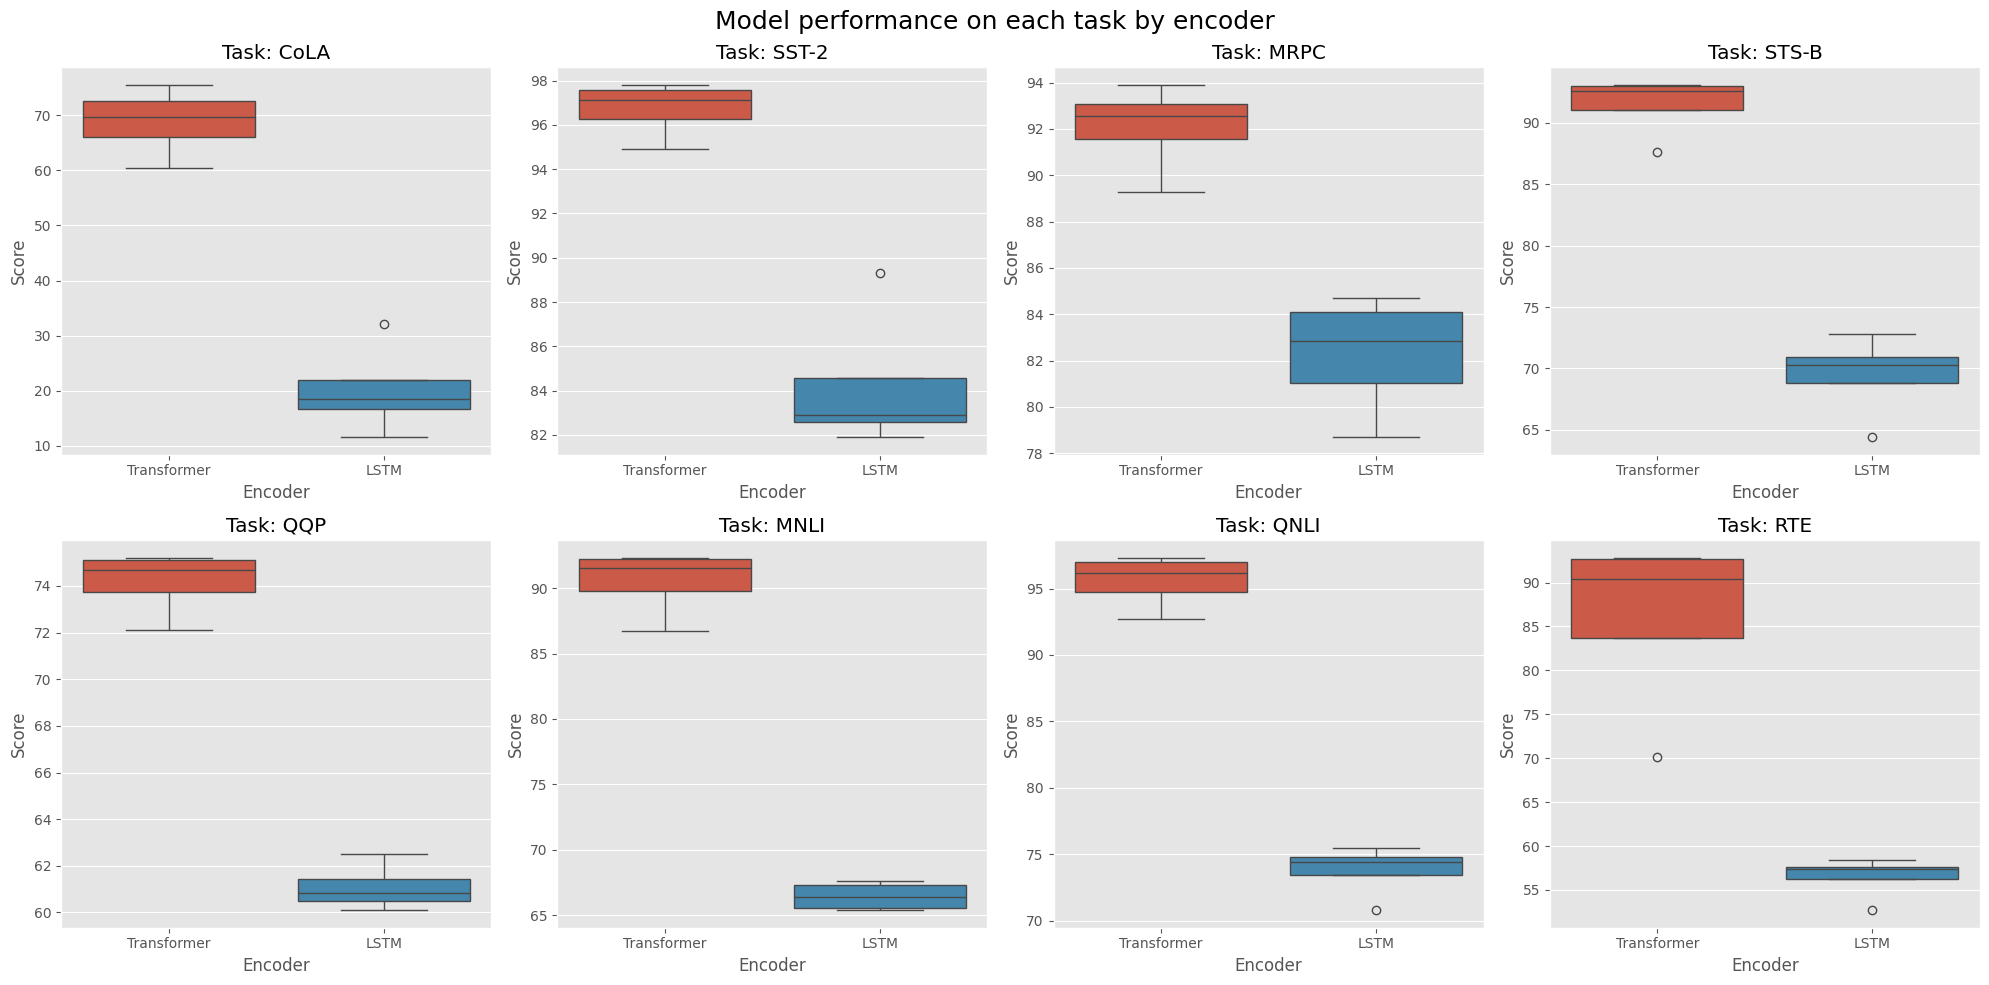

In [52]:
fig, ax =plt.subplots(2, 4, figsize=(20, 10))

tasks = df["Task"].unique()
for i, task in enumerate(tasks):
    g = sns.boxplot(data=df[df["Task"] == task], x="Encoder", y="Score", hue="Encoder", ax=ax[i//4, i%4])
    g.set_title(f"Task: {task}")

plt.suptitle("Model performance on each task by encoder", fontsize=18)
plt.tight_layout()
plt.show()

##### **4. Est-ce que les LSTM ont en moyenne la même performance que les Transformer ?**

- Toutes tâches confondues, il apparaît clairement que les Transformers sont de loin plus performants que les LSTM.

##### **5. Testons l'hypothèse HO : "Les LSTM ont en moyenne le même score que les Transformers sur la tâche RTE" (upcoming).**